In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
mktcap = pd.read_pickle("ryu_new_mktcap9.pickle")
price = pd.read_pickle("ryu_new_price9.pickle")
vol = pd.read_pickle("ryu_new_volume9.pickle")

rtn = price.pct_change(fill_method=None) * np.sign(price)
weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)

In [4]:
len(vol.columns), len(price.columns), len(mktcap.columns)

(9406, 9406, 9406)

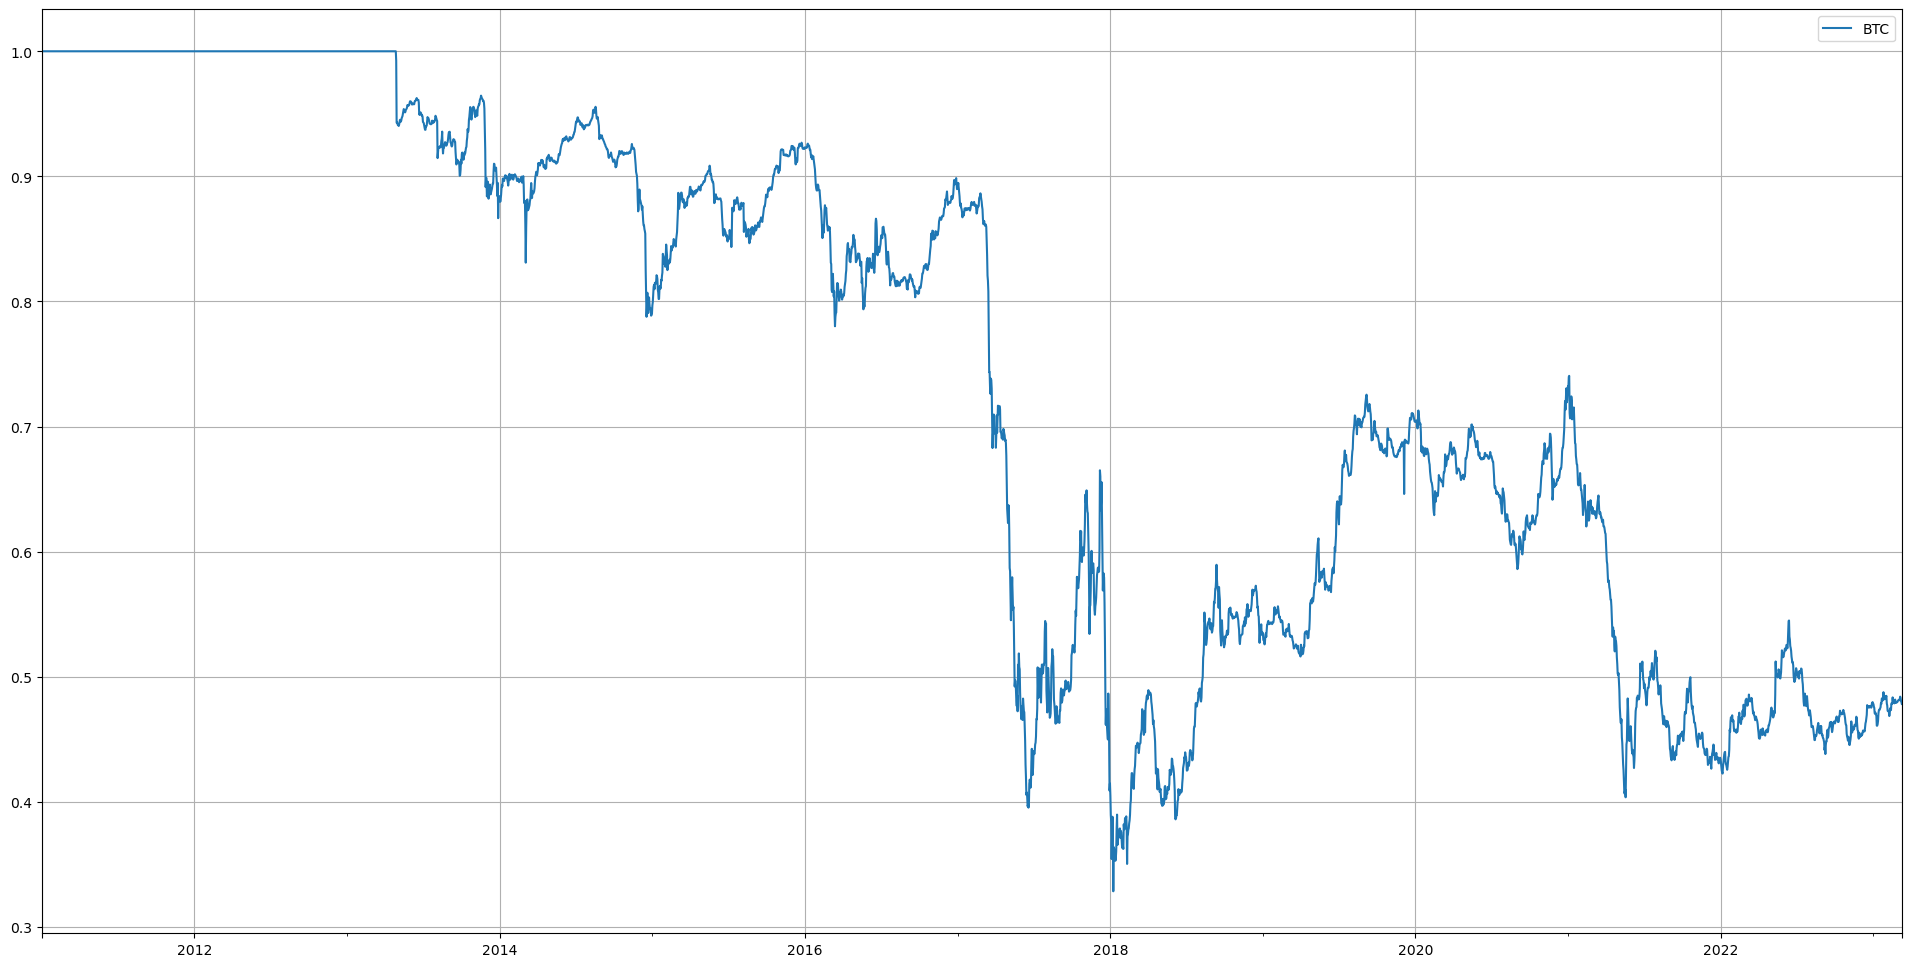

In [6]:
weight[["BTC"]].loc[:].plot(figsize=(24,12))
plt.grid();

1.	2014-03-04 BTC weight 갑자기 감소 점검

In [7]:
weight_rtn = weight.pct_change(fill_method=None) * np.sign(weight)

In [8]:
s = rtn.loc["2014-03-04"]

s.sort_values(ascending=False)
# AUR, GLC 점검 -> 둘다 문제 없음

AUR      0.873306
GLC      0.749695
SMC      0.238318
HBN      0.227680
DGC      0.226196
           ...   
eRSDL         NaN
g9tro         NaN
imBTC         NaN
yBXTB         NaN
yTOFU         NaN
Name: 2014-03-04 00:00:00, Length: 9406, dtype: float64

In [9]:
weight_rtn.loc["2014-03-04"].sort_values(ascending=False)

AUR      0.593355
DGC      0.055408
LTC      0.054519
QRK      0.040956
WDC      0.017790
           ...   
eRSDL         NaN
g9tro         NaN
imBTC         NaN
yBXTB         NaN
yTOFU         NaN
Name: 2014-03-04 00:00:00, Length: 9406, dtype: float64

AUR : 아무 문제 없음...

<AxesSubplot:>

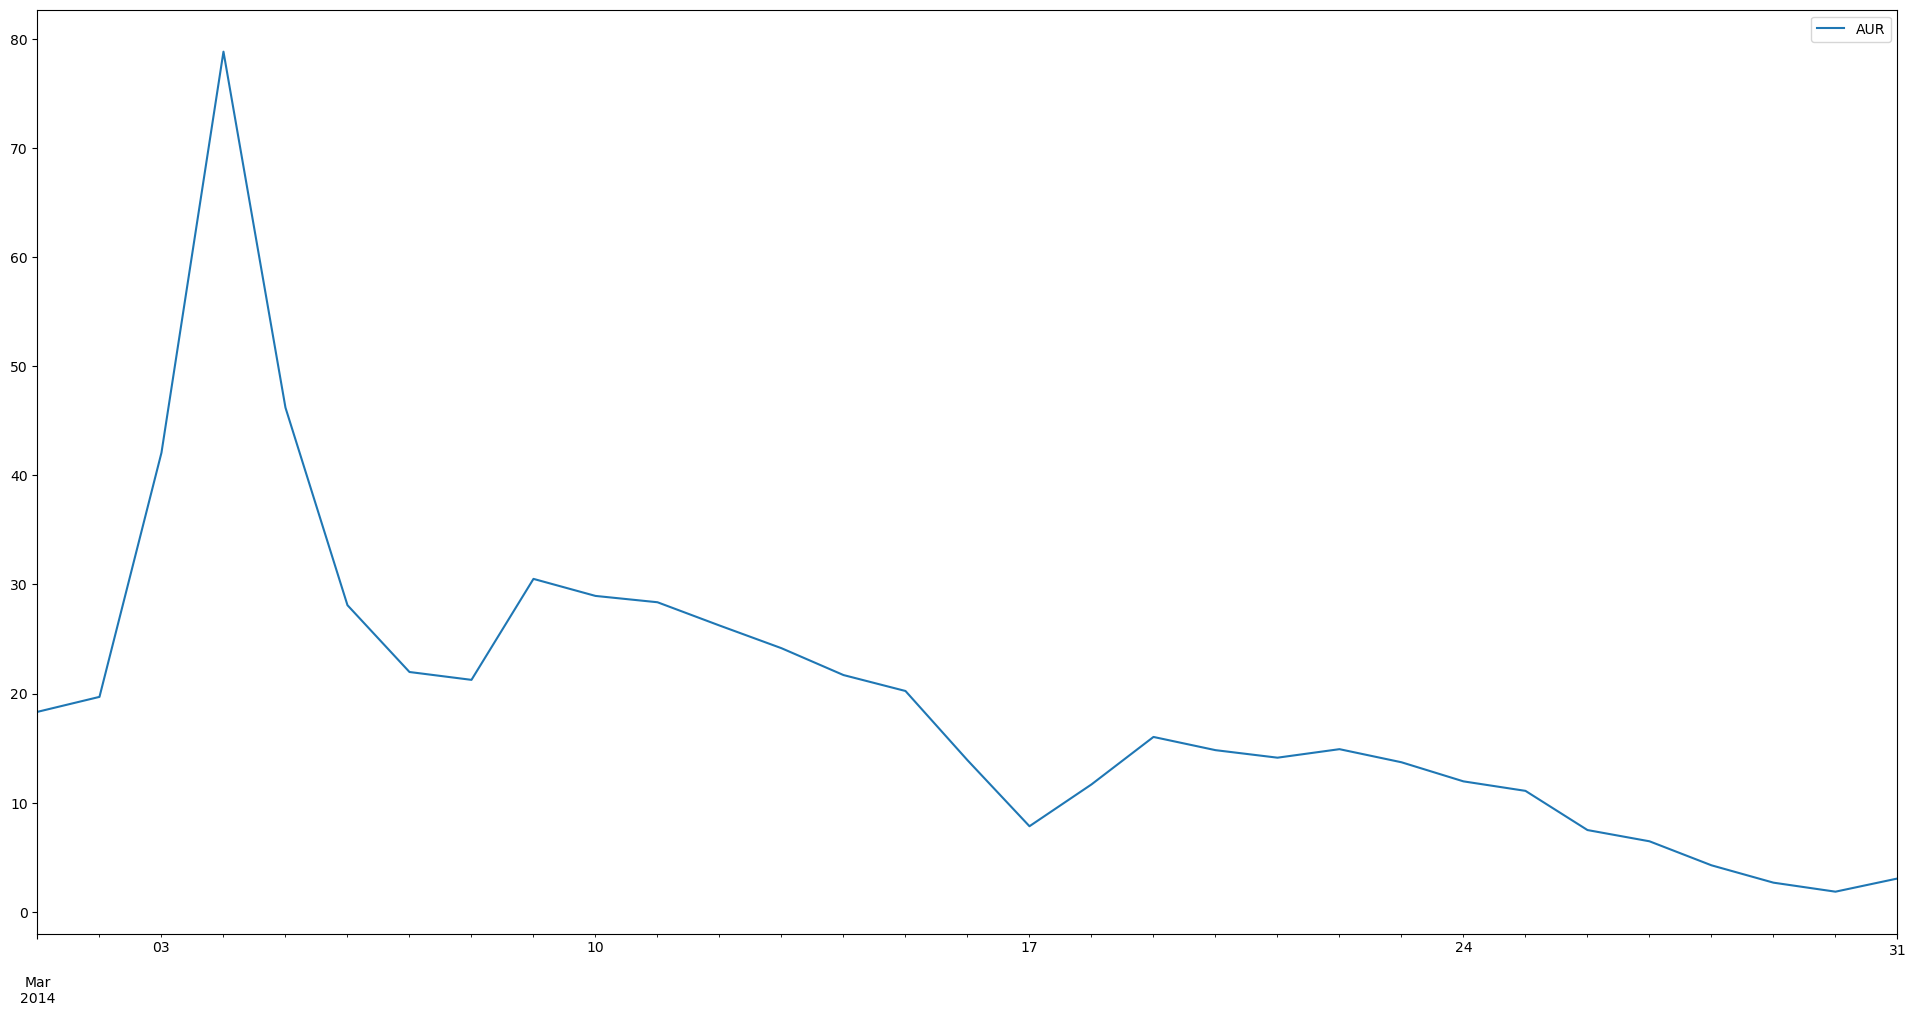

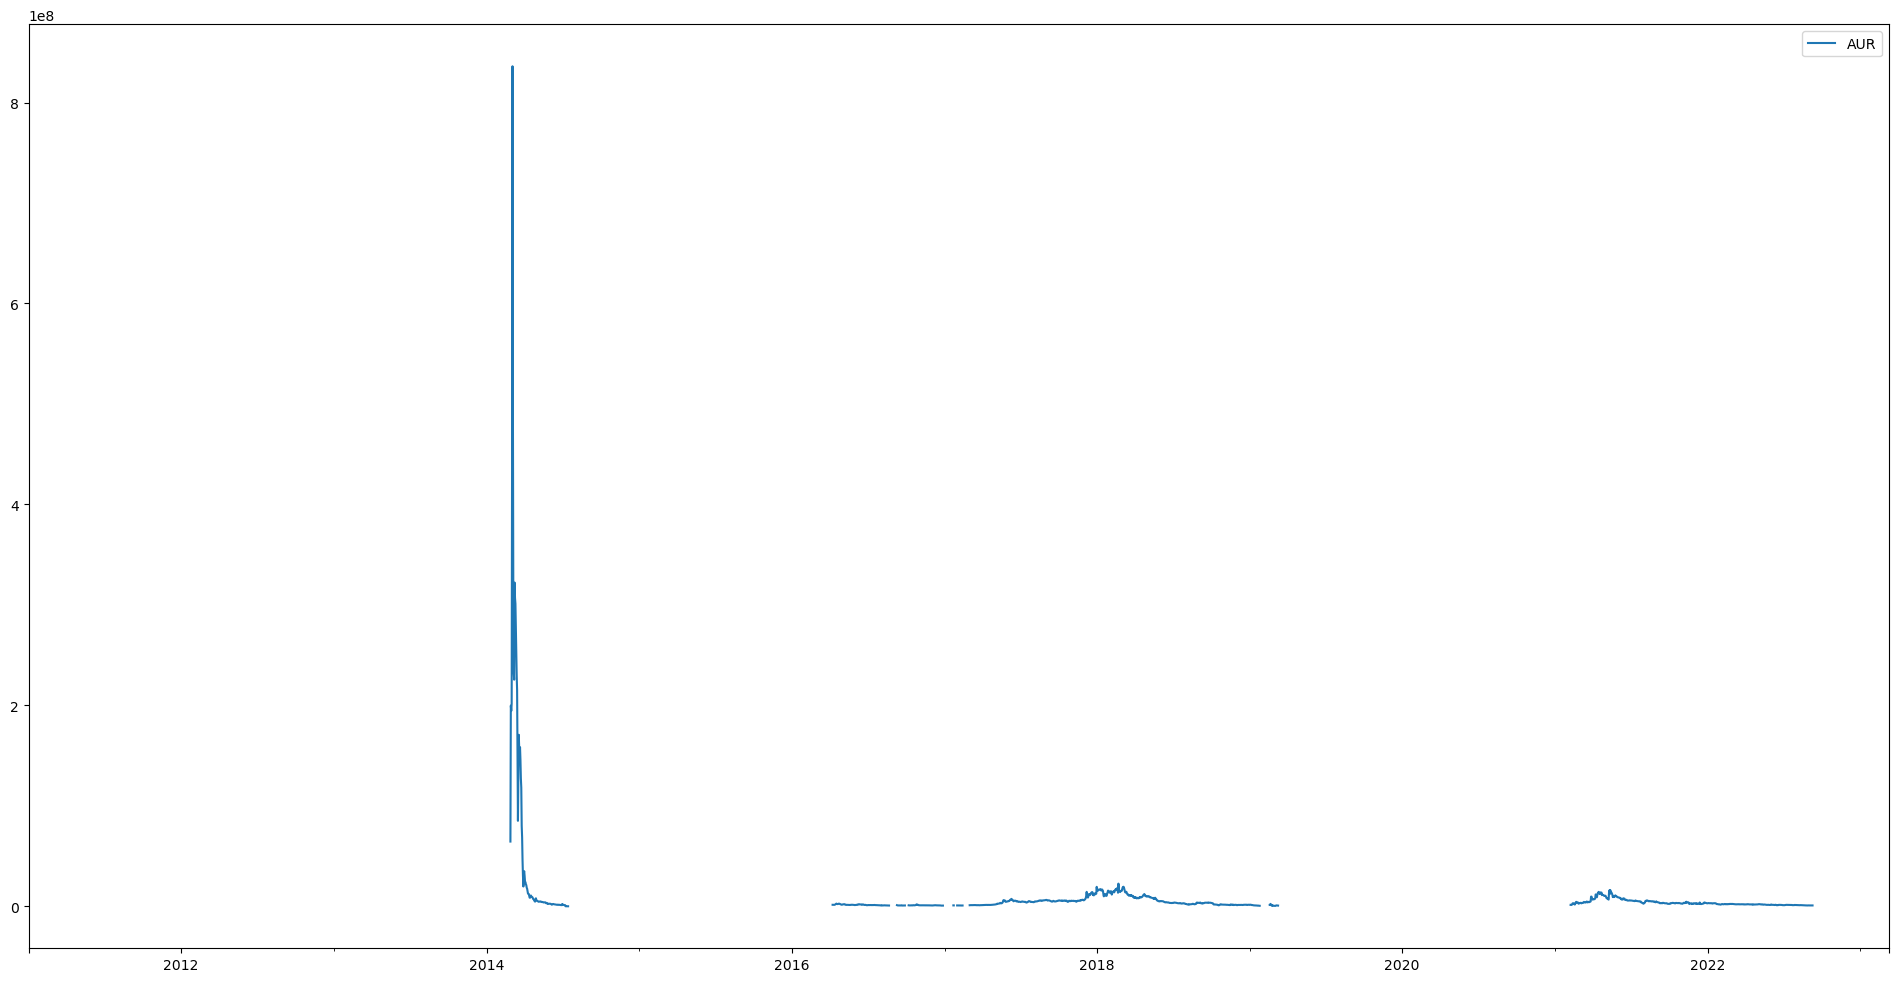

In [10]:
coin = "AUR"
t_0 = "2014-03-03"
t_1 = "2014-03-04" # 수정할 날

price[[coin]].loc["2014-03"].plot(figsize=(24,12))
mktcap[[coin]].loc[:].plot(figsize=(24,12))

Vol 0 이상으로 스크리닝

In [11]:
vol_mask = (vol > 0).replace(False, np.nan)

In [14]:
new_mktcap = (vol_mask * mktcap)

In [15]:
# new_mktcap이 0보다 큰 날을 찾아보자
sum_num = (~new_mktcap.isna()).sum(1)
sum_num.loc[sum_num>0]

2013-12-26       1
2013-12-27      22
2013-12-28      23
2013-12-29      23
2013-12-30      23
              ... 
2023-03-06    1174
2023-03-07    1179
2023-03-08    1184
2023-03-09    1183
2023-03-10    1186
Length: 3362, dtype: int64

In [16]:
new_weight = new_mktcap.loc["2013-12-27":].apply(lambda x:x/np.nansum(x), axis=1)

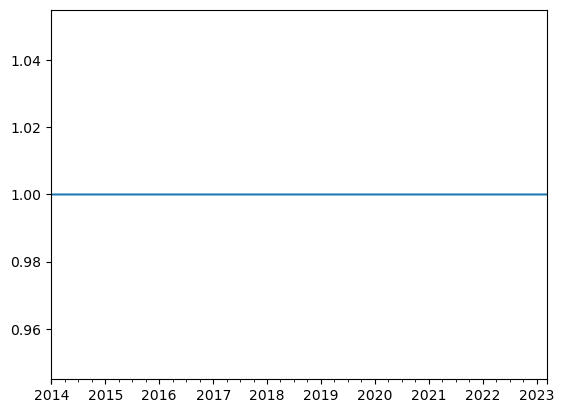

In [19]:
new_weight.sum(1).plot();

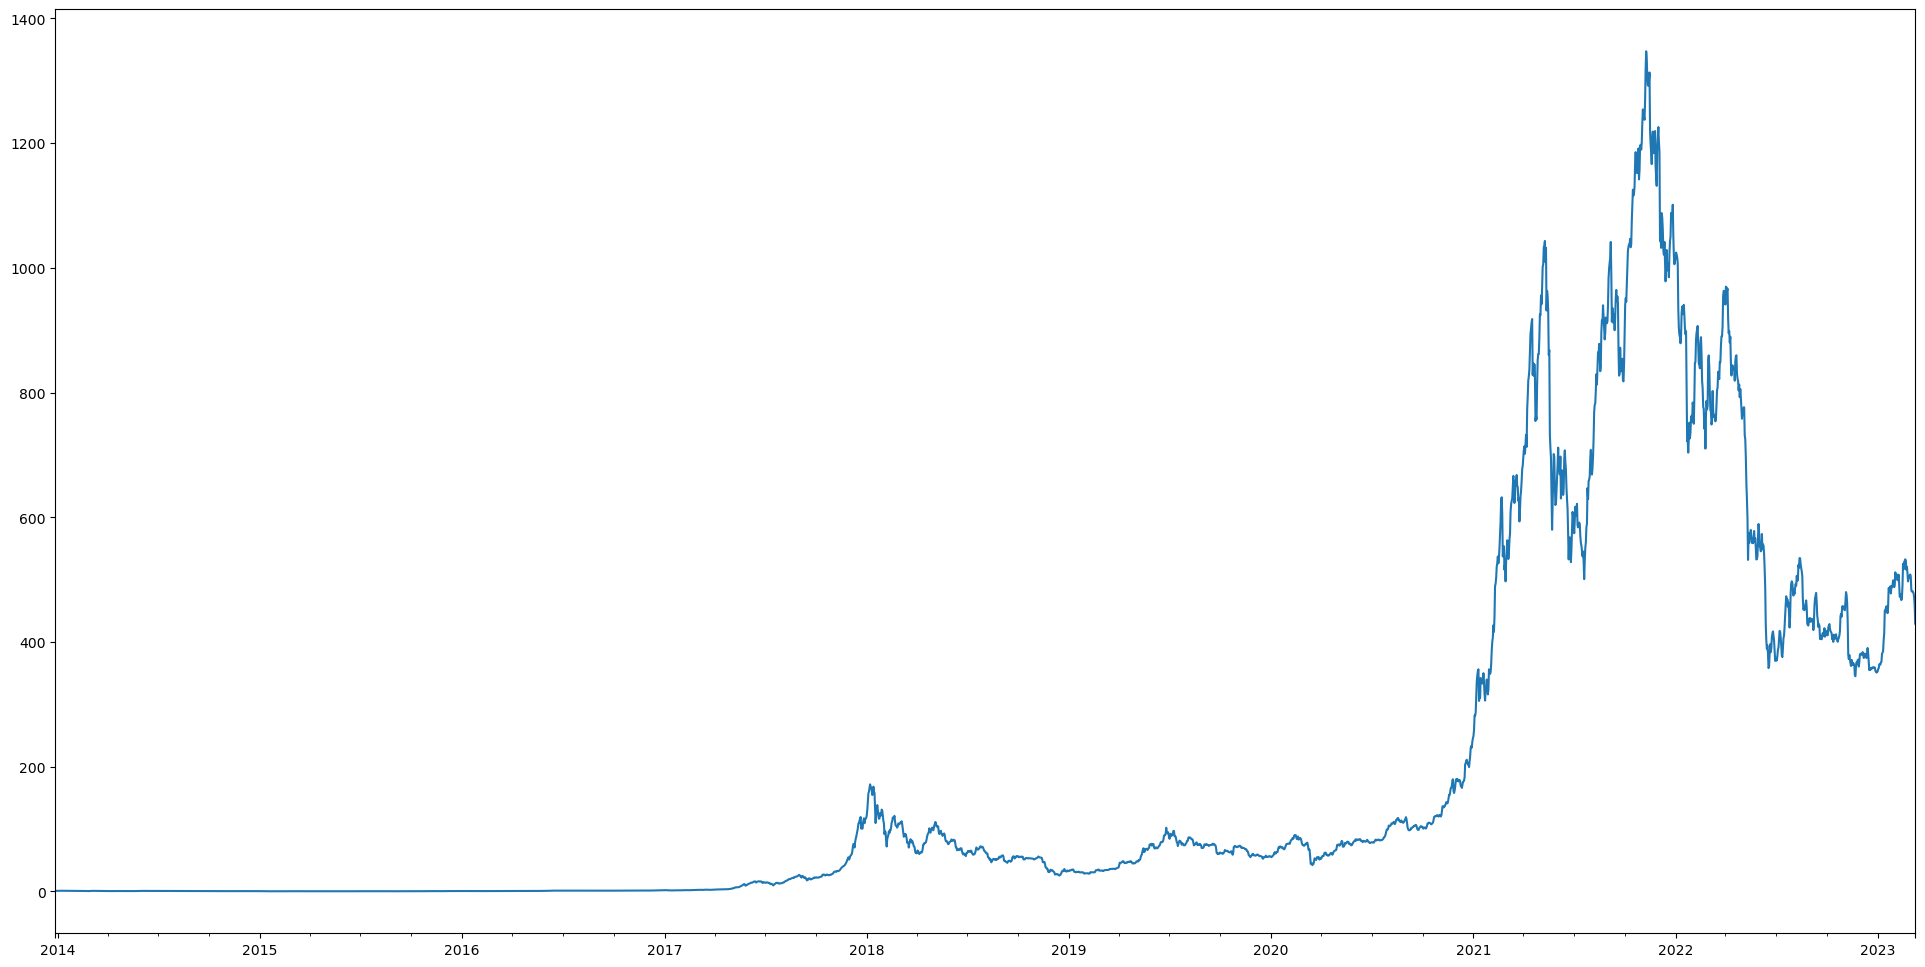

In [26]:
((rtn.loc["2013-12-27":] * new_weight).sum(1) + 1).loc[:].cumprod().plot(figsize=(24,12));